# Тема “Обучение без учителя”

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

## Задание 1
1. Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib

2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

3.1 Создайте датафреймы X и y из этих данных.

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


3.2 Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

4. Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

5. Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [7]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = model.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

6. Постройте диаграмму рассеяния на этих данных.


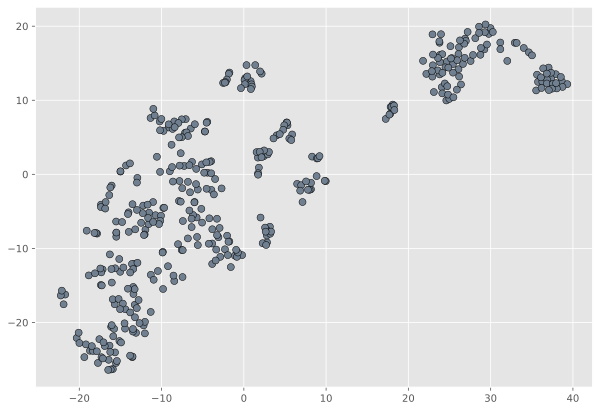

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c='slategrey', edgecolors='k', s=50)
plt.show()

## Задание 2
1. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)
train_labels.shape

(404,)

2. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

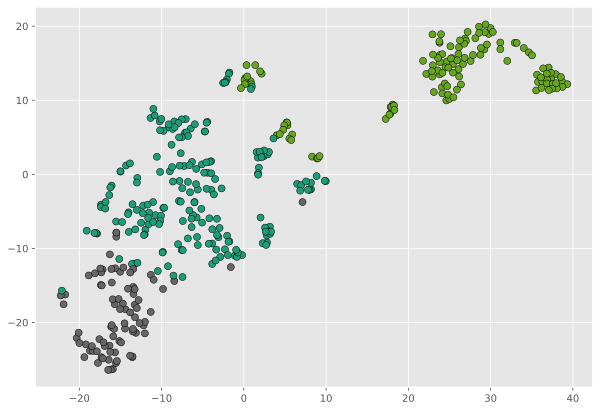

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
            c=train_labels, edgecolors='k', s=50, cmap ='Dark2')
plt.show()

3. Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
for i in range(3):
    print('среднее значение "price" для', i, '-го кластера',
          round(y_train[train_labels == i].mean(), 3))
print()

for i in range(3):
    print('среднее значение "CRIM" для', i, '-го кластера',
          round(X_train['CRIM'][train_labels == i].mean(), 3))

среднее значение "price" для 0 -го кластера 24.958
среднее значение "price" для 1 -го кластера 16.165
среднее значение "price" для 2 -го кластера 27.788

среднее значение "CRIM" для 0 -го кластера 0.422
среднее значение "CRIM" для 1 -го кластера 10.797
среднее значение "CRIM" для 2 -го кластера 0.074


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
test_labels = model.predict(X_test_scaled)
for i in range(3):
    print('среднее значение "price" для', i, '-го кластера',
          round(y_test[test_labels == i].mean(), 3))
print()

for i in range(3):
    print('среднее значение "CRIM" для', i, '-го кластера',
          round(X_test['CRIM'][test_labels == i].mean(), 3))

среднее значение "price" для 0 -го кластера 21.861
среднее значение "price" для 1 -го кластера 16.437
среднее значение "price" для 2 -го кластера 31.35

среднее значение "CRIM" для 0 -го кластера 0.266
среднее значение "CRIM" для 1 -го кластера 10.166
среднее значение "CRIM" для 2 -го кластера 0.062
